In [82]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df = pd.read_csv("steamspy_data.csv")
df.head()

,appid,name,developer,publisher,positive,negative,owners,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,216345,5530,10000000 - 20000000,999,999,0,"English,French,German,Italian,Spanish,Chinese,...",Action,10775,{'Action': 5448 'FPS': 4862 'Multiplayer': 341...
1,20,Team Fortress Classic,Valve,Valve,6472,990,5000000 - 10000000,499,499,0,"English,French,German,Italian,Spanish,Korean,R...",Action,77,{'Action': 759 'FPS': 320 'Multiplayer': 272 '...
2,30,Day of Defeat,Valve,Valve,5686,634,5000000 - 10000000,499,499,0,"English,French,German,Italian,Spanish",Action,89,{'FPS': 794 'World War II': 261 'Multiplayer':...
3,40,Deathmatch Classic,Valve,Valve,2242,490,5000000 - 10000000,499,499,0,"English,French,German,Italian,Spanish,Korean,R...",Action,8,{'Action': 633 'FPS': 147 'Classic': 113 'Mult...
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,17468,890,2000000 - 5000000,499,499,0,"English,French,German,Korean",Action,162,{'FPS': 905 'Action': 343 'Classic': 271 'Sci-...


In [84]:
df.shape

(1000, 14)

In [85]:
df.dtypes

appid            int64
name            object
developer       object
publisher       object
positive         int64
negative         int64
owners          object
price            int64
initialprice     int64
discount         int64
languages       object
genre           object
ccu              int64
tags            object
dtype: object

**Q1. Is there is a duplicate records in this dataset ? if yes, then remove them**

In [86]:
df.duplicated().sum()  # if we found any dublicate date then will use "df.drop_duplicates(inplace=True)"

0

**Q2. Is there is a null values in this data ? If yes then show it in the heatmap**

In [87]:
df.isnull().sum()

appid           0
name            0
developer       1
publisher       0
positive        0
negative        0
owners          0
price           0
initialprice    0
discount        0
languages       0
genre           3
ccu             0
tags            0
dtype: int64

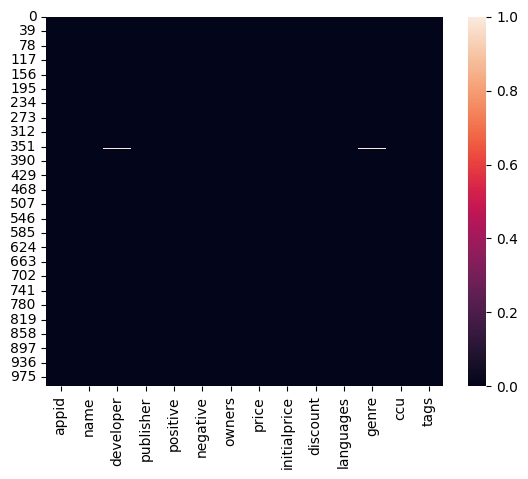

In [88]:
sns.heatmap(df.isnull())
plt.show()

**Q3. For ‘Left 4 Dead 2’ Game what is the appid and who is the developer of this Game ?**

In [89]:
df.loc[df['name']=="Left 4 Dead 2",['appid','developer']]

,appid,developer
21,550,Valve


**Top Selling Games:** What are the top 10 best-selling games based on the number of owners?

In [90]:
# 'positive' and 'negative' represent user ratings or reviews
df['total_reviews'] = df['positive'] + df['negative']

#'price' represents the current price of the game after discounts
df['revenue'] = df['price'] * df['owners']

# Sort the DataFrame by revenue to find the top selling games
top_selling_games = df.sort_values(by='revenue', ascending=False)

# Display the top selling games
top_selling_games[['appid', 'name', 'revenue', 'total_reviews']].head()


,appid,name,revenue,total_reviews
869,1063730,New World,50000000 - 10000000050000000 - 100000000500000...,258104
401,271590,Grand Theft Auto V,50000000 - 10000000050000000 - 100000000500000...,1583872
986,1811260,EA SPORTS FIFA 23,5000000 - 100000005000000 - 100000005000000 - ...,126489
808,814380,Sekiro: Shadows Die Twice - GOTY Edition,5000000 - 100000005000000 - 100000005000000 - ...,239316
546,374320,DARK SOULS III,5000000 - 100000005000000 - 100000005000000 - ...,354770


**Price Distribution:** What is the distribution of game prices in database?

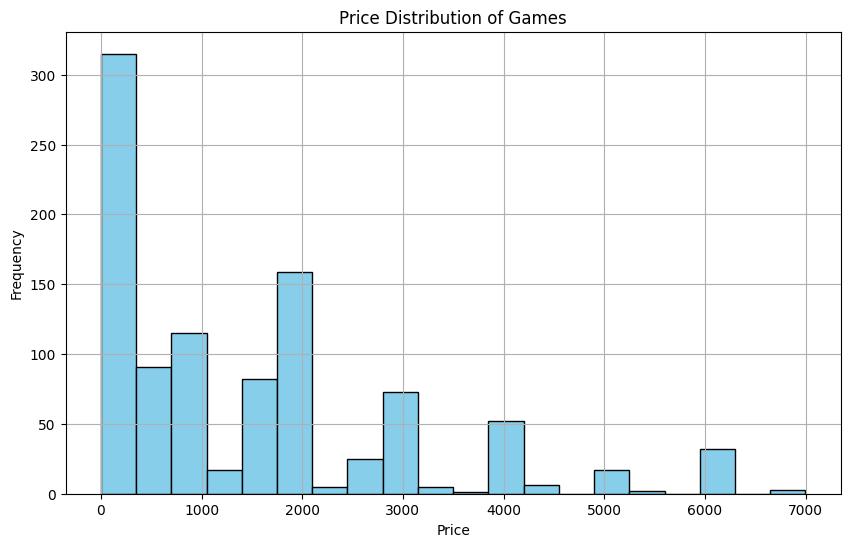

In [91]:
# df with the 'price' variable
# Create a histogram of game prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Games')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Genre Analysis:** Which game genre has the highest average positive review score?

In [92]:
# Group the data by genre and calculate the average positive review score for each genre
genre_avg_positive = df.groupby('genre')['positive'].mean()

# Find the genre with the highest average positive review score
highest_avg_positive_genre = genre_avg_positive.idxmax()
highest_avg_positive_score = genre_avg_positive.max()

print(f"The genre with the highest average positive review score is '{highest_avg_positive_genre}' with a score of {highest_avg_positive_score:.2f}")

The genre with the highest average positive review score is 'Action Adventure Free to Play Massively Multiplayer' with a score of 687870.00


**Developer Success:** Which developer has the highest number of games in the database?

In [93]:
# Group the data by developer and count the number of games for each developer
developer_game_counts = df['developer'].value_counts()

# Find the developer with the highest number of games
highest_game_count_developer = developer_game_counts.idxmax()
highest_game_count = developer_game_counts.max()

print(f"The developer with the highest number of games is '{highest_game_count_developer}' with {highest_game_count} games.")

The developer with the highest number of games is 'Valve' with 27 games.


**Publisher Influence:** What is the correlation between the number of games published by a publisher and their average review scores?

In [94]:
# Group the data by publisher and calculate the number of games and the average positive review score for each publisher
publisher_stats = df.groupby('publisher')['positive'].agg(['count', 'mean'])

# Calculate the correlation between the number of games and average review scores
correlation = publisher_stats['count'].corr(publisher_stats['mean'])

print(f"The correlation between the number of games published and average review scores is: {correlation:.2f}")

The correlation between the number of games published and average review scores is: 0.04


**Price vs. Reviews:** Is there a relationship between game price and review scores (positive/negative)?

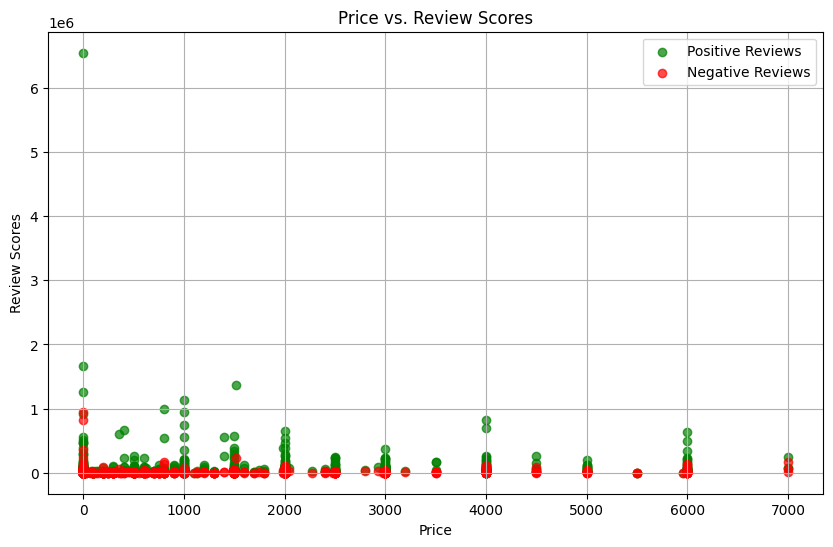

In [95]:
# Create a scatter plot to visualize the relationship between game price and positive review scores
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['positive'], color='green', label='Positive Reviews', alpha=0.7)
plt.scatter(df['price'], df['negative'], color='red', label='Negative Reviews', alpha=0.7)
plt.title('Price vs. Review Scores')
plt.xlabel('Price')
plt.ylabel('Review Scores')
plt.legend()
plt.grid(True)
plt.show()

**Discount Impact:** Do games with higher discounts tend to have more positive reviews?

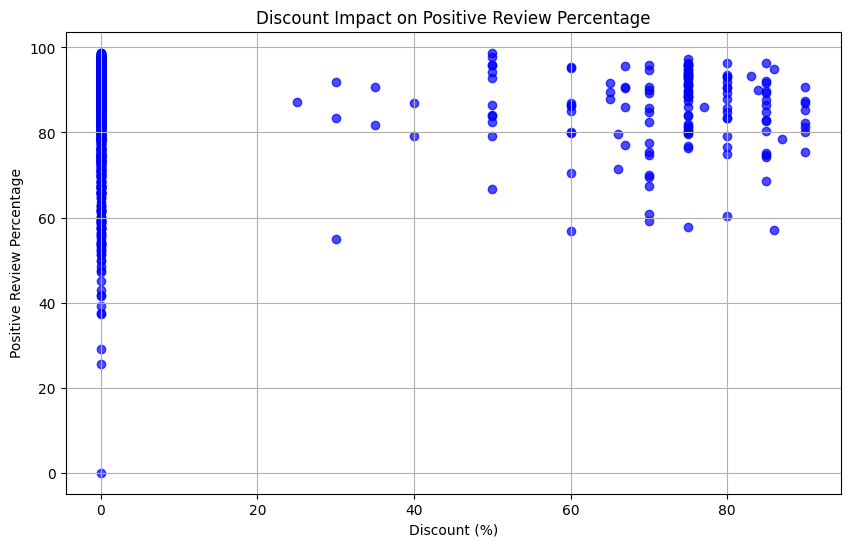

In [96]:
# Calculate the percentage of positive reviews for each game
df['positive_percentage'] = (df['positive'] / (df['positive'] + df['negative'])) * 100

# Create a scatter plot to visualize the relationship between discount and positive review percentage
plt.figure(figsize=(10, 6))
plt.scatter(df['discount'], df['positive_percentage'], color='blue', alpha=0.7)
plt.title('Discount Impact on Positive Review Percentage')
plt.xlabel('Discount (%)')
plt.ylabel('Positive Review Percentage')
plt.grid(True)
plt.show()

**Language Diversity:** How many different languages are supported by the games in the database on average?

In [97]:
# Split the languages column into a list of languages for each game
df['languages'] = df['languages'].str.split(',')

# Calculate the average number of different languages
average_languages = df['languages'].apply(lambda x: len(set(x))).mean()

print(f"Average number of different languages supported by games: {average_languages:.2f}")

Average number of different languages supported by games: 9.80


**Average Game Price:** What is the average price of games in each genre?

In [98]:
# Calculate the average price of games in each genre
average_price_by_genre = df.groupby('genre')['price'].mean()
average_price_by_genre.head()

genre
Action                                                              1896.635135
Action Adventure                                                    1862.785714
Action Adventure Casual                                             4249.000000
Action Adventure Casual Free to Play Indie                             0.000000
Action Adventure Casual Free to Play Indie Massively Multiplayer       0.000000
Name: price, dtype: float64

**Positive vs. Negative Reviews:** Is there a correlation between the number of positive reviews and the number of negative reviews for a game?

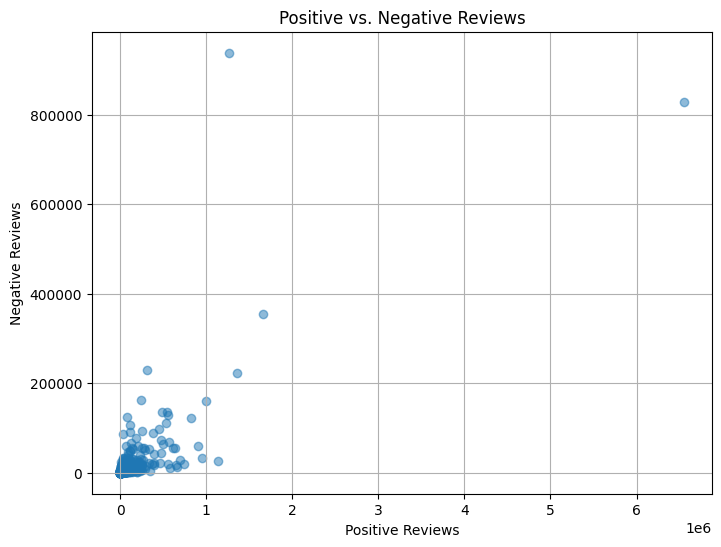

Correlation between positive and negative reviews: 0.77


In [99]:
# Calculate the correlation between positive and negative reviews
correlation = df['positive'].corr(df['negative'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['positive'], df['negative'], alpha=0.5)
plt.title('Positive vs. Negative Reviews')
plt.xlabel('Positive Reviews')
plt.ylabel('Negative Reviews')
plt.grid(True)
plt.show()

print(f"Correlation between positive and negative reviews: {correlation:.2f}")

**Game Ownership vs. Price:** Is there a relationship between the number of owners and the game price?

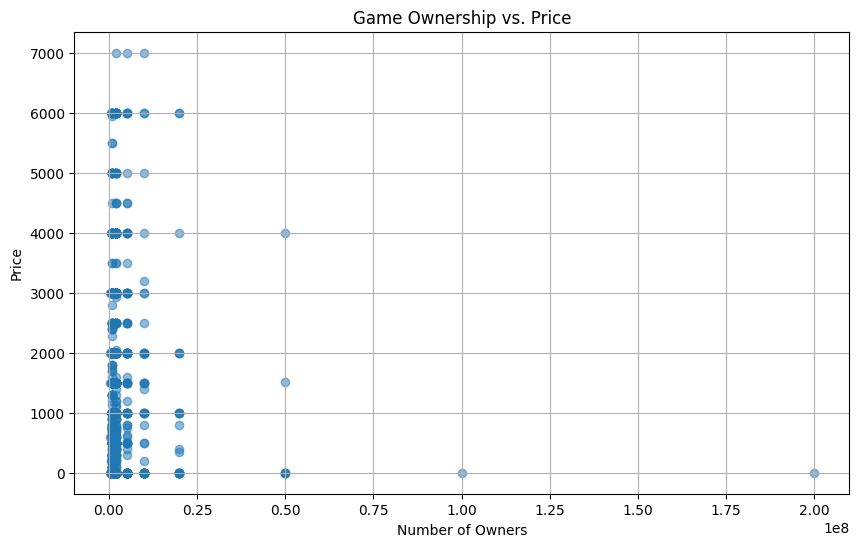

In [100]:
# Modifying the 'owners' column to use the lower bound of the range
df['owners'] = df['owners'].str.split(' - ').str[0].str.replace(',', '').astype(int)

# Filtering out rows with missing values in the selected columns
selected_columns = ['owners', 'price']
filtered_df = df[selected_columns].dropna()

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['owners'], filtered_df['price'], alpha=0.5)
plt.title('Game Ownership vs. Price')
plt.xlabel('Number of Owners')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Developer vs. Publisher Success:** Are there any patterns between a developer's success (number of games) and the publisher they work with?

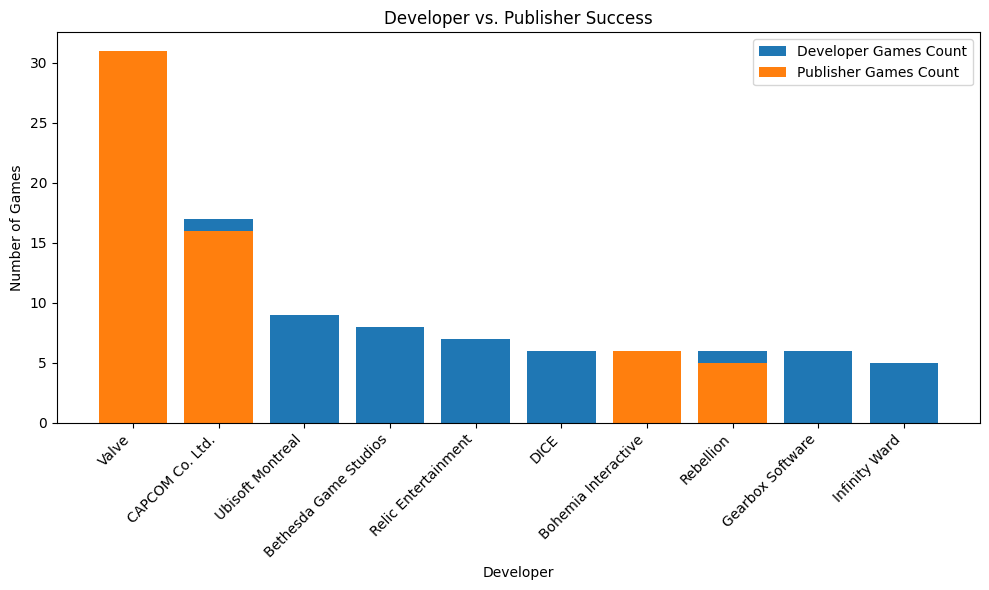

In [101]:
# Grouping the data by developer and publisher to count the number of games
developer_counts = df.groupby('developer')['name'].count()
publisher_counts = df.groupby('publisher')['name'].count()

# Creating a DataFrame to compare developer and publisher success
success_df = pd.DataFrame({
    'Developer': developer_counts.index,
    'Developer Games Count': developer_counts.values,
    'Publisher Games Count': [publisher_counts.get(publisher, 0) for publisher in developer_counts.index]
})

# Sorting the DataFrame by Developer Games Count in descending order
success_df = success_df.sort_values(by='Developer Games Count', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(success_df['Developer'][:10], success_df['Developer Games Count'][:10], label='Developer Games Count')
plt.bar(success_df['Developer'][:10], success_df['Publisher Games Count'][:10], label='Publisher Games Count')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.title('Developer vs. Publisher Success')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Popular Genres:** What are the top three most popular game genres based on the number of games in the database?

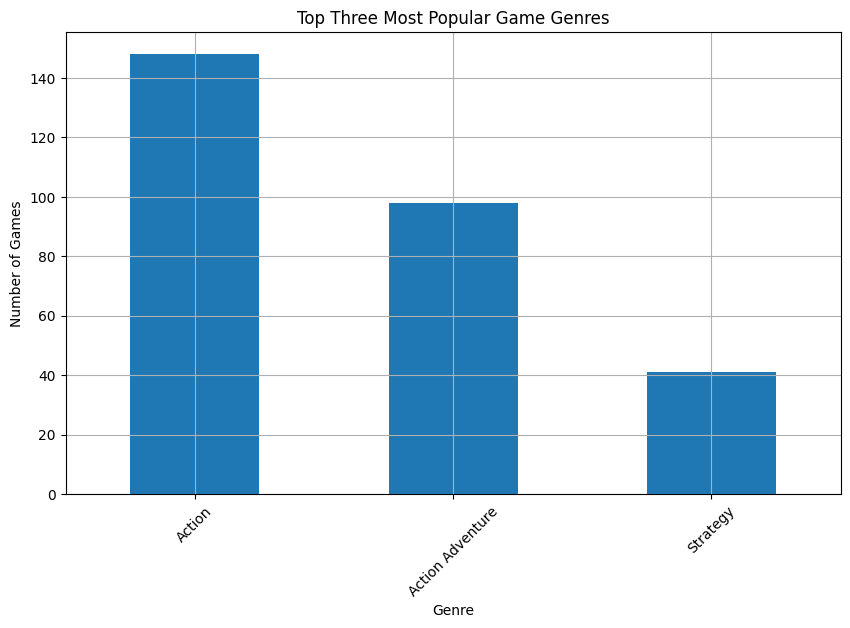

In [108]:
# Count the number of games in each genre
genre_counts = df['genre'].value_counts()

# Get the top three most popular genres
top_genres = genre_counts.head(3)

# Plotting the results
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Top Three Most Popular Game Genres')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Discount and Ownership:** Is there a relationship between the discount percentage and the number of owners a game has?

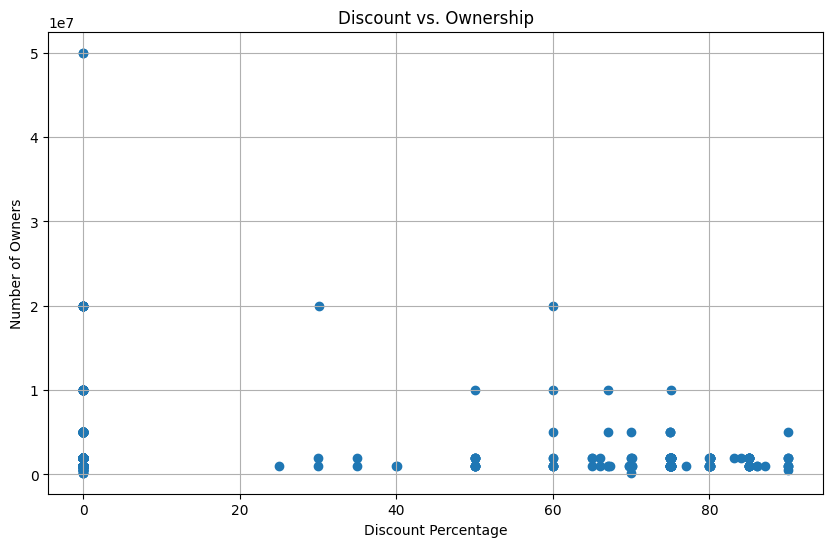

In [109]:
# Convert 'owners' column to numeric, treating non-numeric entries as NaN
df['owners'] = pd.to_numeric(df['owners'], errors='coerce')

# Calculate the discount percentage
df['discount_percentage'] = ((df['initialprice'] - df['price']) / df['initialprice']) * 100

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['discount_percentage'], df['owners'])
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Owners')
plt.title('Discount vs. Ownership')
plt.grid(True)
plt.show()

**Developer Performance:** Which developer has the highest average review score?

In [110]:
# Convert 'positive' column to numeric, treating non-numeric entries as NaN
df['positive'] = pd.to_numeric(df['positive'], errors='coerce')

# Group by developer and calculate the average review score for each
average_review_scores = df.groupby('developer')['positive'].mean()

# Find the developer with the highest average review score
highest_avg_review_developer = average_review_scores.idxmax()
highest_avg_review_score = average_review_scores.max()

print(f"The developer with the highest average review score is {highest_avg_review_developer} with an average score of {highest_avg_review_score:.2f}")

The developer with the highest average review score is Valve Hidden Path Entertainment with an average score of 6547618.00


**Genre and Price:** Is there a correlation between the game genre and its price?

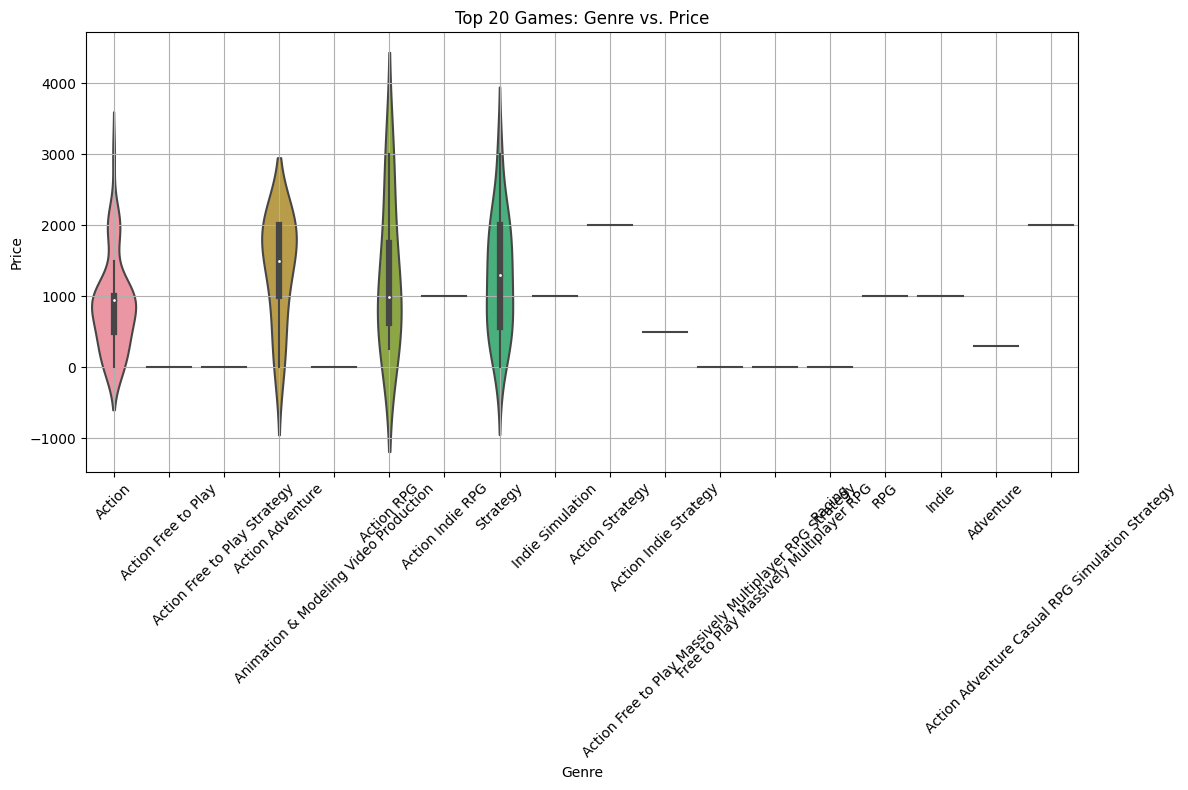

In [116]:
# Convert 'price' column to numeric, treating non-numeric entries as NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Assuming you have a 'genre' column representing the game genre

# Select the top 20 data entries based on some criteria (you can replace this with your actual criteria)
top_20_entries = df.head(100)

# Plotting the results using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='genre', y='price', data=top_20_entries)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.title('Top 20 Games: Genre vs. Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()